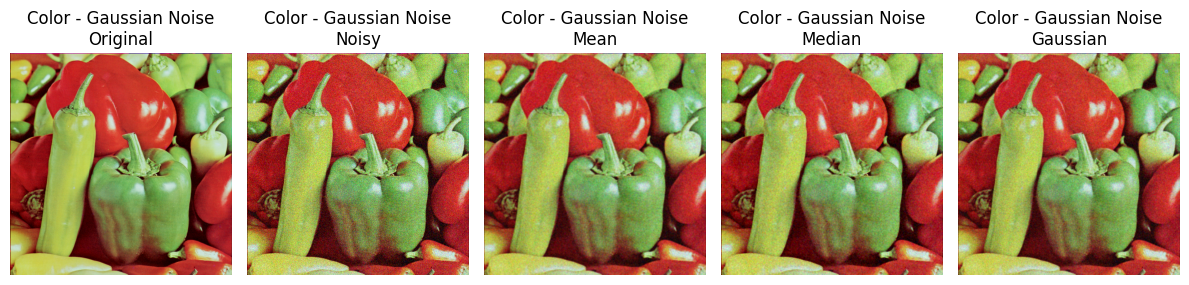

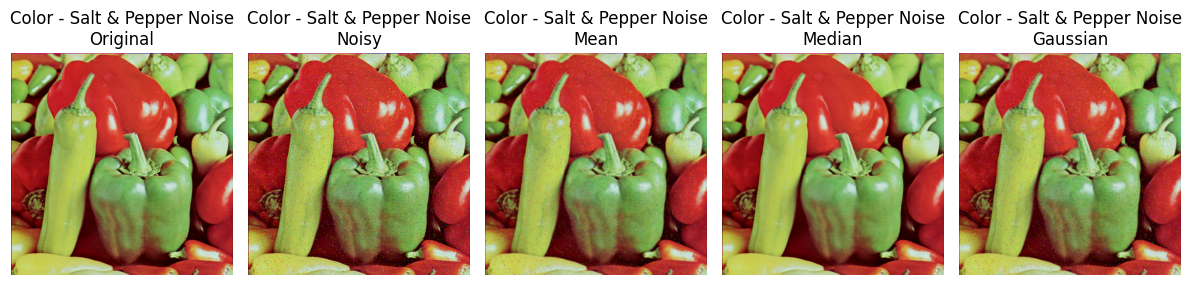

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage import img_as_ubyte


def add_noise_color(image):
    # Normalize to [0,1] for skimage
    image_float = image / 255.0
    g_noise = random_noise(image_float, mode="gaussian", var=0.01)
    sp_noise = random_noise(image_float, mode="s&p", amount=0.02)
    return img_as_ubyte(g_noise), img_as_ubyte(sp_noise)


def apply_filters(image):
    mean = cv2.blur(image, (3, 3))
    median = cv2.medianBlur(image, 3)
    gaussian = cv2.GaussianBlur(image, (3, 3), 0)
    return mean, median, gaussian


def plot_comparison(title, original, noisy, mean, median, gaussian):
    plt.figure(figsize=(12, 6))
    titles = ["Original", "Noisy", "Mean", "Median", "Gaussian"]
    images = [original, noisy, mean, median, gaussian]

    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(f"{title}\n{titles[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


image_bgr = cv2.imread("./stdimgs/peppers.png")

gauss, sp = add_noise_color(image_bgr)

gauss_f = apply_filters(gauss)
sp_f = apply_filters(sp)


plot_comparison("Color - Gaussian Noise", image_bgr, gauss, *gauss_f)
plot_comparison("Color - Salt & Pepper Noise", image_bgr, sp, *sp_f)